## sklearn machine learning library
### classification algorithms
### **KNN** (k-nearest neighbors)
### **Machine Learning - K-nearest neighbors (KNN)**
- **KNN** is a **supervised machine learning** algorithm for classifying data points ( *observations*),  
based on the values of the closest existing points
- **k** is the number of nearby points -- neighbors -- to use in the comparison
- **k** is often set to 5, but 3 is also commonly used. 1 is considered too low





In [1]:
# 1. import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import pprint as pp

# 2. import machine learning modules
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

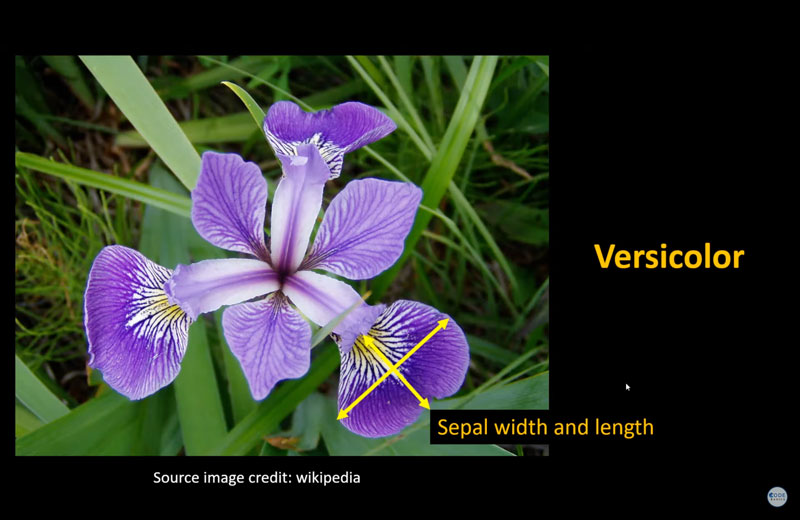

In [2]:
# 3. Output image: 
Image("../images/iris-sepal-width-height-wikipedia.jpg",width=400)

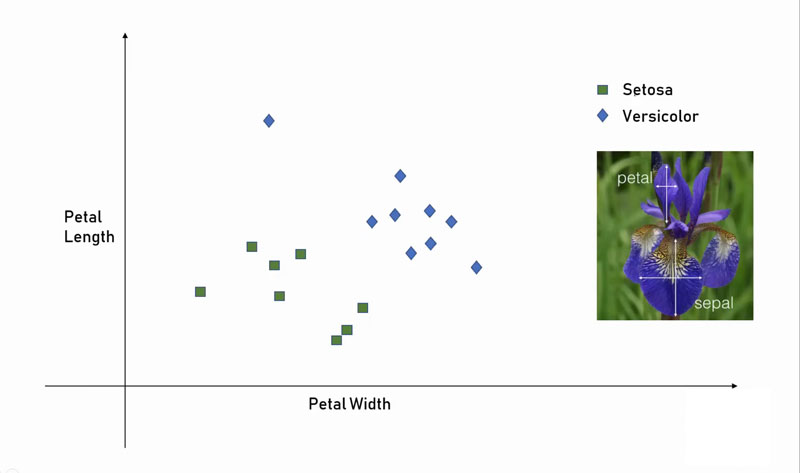

In [3]:
# 4. Display another image
Image('../images/iris-sepal-width-vs-height-plot.jpg')

In [4]:
# 5. instantiate the load_iris() method, saving result to a variable
iris = load_iris()
# print(type(iris)) # <class 'sklearn.utils._bunch.Bunch'>
# print(iris)
iris_dict = dict(iris)
# print('iris_dict:\n',iris_dict)

# 6. Get the iris data from the big "bunch" / dictionary:
iris_data = iris["data"]
# print('iris_data datatype:\n', type(iris_data), len(iris_data))
# print('iris_data:\n',iris_data)

# 7. Check the value, datatype and length of the first 5 items in iris_data:
iris_data_first_5_items = iris_data[:5]
# print('iris_data iris_data_first_5_items:\n', type(iris_data_first_5_items), len(iris_data_first_5_items))
# print('iris_data_first_5_items:\n',iris_data_first_5_items)
# [[5.1 3.5 1.4 0.2]
#  [4.9 3.  1.4 0.2]
#  [4.7 3.2 1.3 0.2]
#  [4.6 3.1 1.5 0.2]
#  [5.  3.6 1.4 0.2]]
# [5.1 3.5 1.4 0.2]

# 8. Drill deeper: check the first item at index 0 in iris_data:
first_item = iris_data[0]
print(first_item) # [5.1 3.5 1.4 0.2]
# first num in the first item:
print(first_item[0]) # 4
# shape of the first item in iris_data:
print(first_item.shape) # (4,)
# datatype of first item in iris_data:
print(type(first_item)) # <class 'numpy.ndarray'>
# shape of first num in first_item
print(first_item[0].shape) # ()
print(type(first_item[0])) # float

[5.1 3.5 1.4 0.2]
5.1
(4,)
<class 'numpy.ndarray'>
()
<class 'numpy.float64'>


In [5]:
# get all the keys from the iris bunch:
iris_keys = list(iris_dict.keys())
pp.pprint(iris_keys)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']


In [6]:
# 9. Get the features, that is the column names if we make a df from the data:
col_names = iris['feature_names']
pp.pprint(col_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']


In [40]:
# 10. Make a df from the iris data, using the feature_names as the column names:
iris_df = pd.DataFrame(iris_data,
                       columns=col_names)

print(iris_df.shape) # (150, 4)
iris_df.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
# 11. Print the iris species names, as stored in the target_names list:
target_names = iris['target_names']
print('target_names:',target_names) # ['setosa' 'versicolor' 'virginica']
print("target_names[0]:",target_names[0])
print("target_names[1]:",target_names[1])
print("target_names[2]:",target_names[2])

# 12. Print the target values: 150 0's, 1's and 2's, which correspond to the 3 species:
target_nums = iris['target']
print('target_nums:\n',target_nums)

# the target values of 0, 1 and 2 correspond to the 3
# irises species: 'setosa', 'versicolor', 'virginica'
# 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
#  0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
#  1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
#  2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),

target_names: ['setosa' 'versicolor' 'virginica']
target_names[0]: setosa
target_names[1]: versicolor
target_names[2]: virginica
target_nums:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [48]:
# 13. Declare a new column, 'target' the value of which is the 150-item target array of 0's, 1's and 2's
iris_df['target'] = target_nums

In [49]:
# 14. Output the updated df, now with 'target' column:
print(iris_df.shape) # (150,5)
iris_df.head(2)

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


#### making a 'species' column using apply(lambda)

In [54]:
# 15. Challenge: 
# Declare a 'species' column using apply(lambda)
# called on the 'target' column, which has values of 0,1,2:
#  - lambda input (argument) is the target number, as t [0,1,2]
#  - lambda output (return value) is the item in target_names list at index t
# output (return value) is 'setosa', 'versicolor' or 'virginica'
# output value is saved as the value for the new 'species' column at that corresponding row
iris_df['species'] = iris_df['target'].apply(lambda t : target_names[t])

In [56]:
# 16. Output the updated df, now with 'species' column:
print(iris_df.shape) # (150, 6)
iris_df.sample(5)

(150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
13,4.3,3.0,1.1,0.1,0,setosa
73,6.1,2.8,4.7,1.2,1,versicolor
23,5.1,3.3,1.7,0.5,0,setosa
18,5.7,3.8,1.7,0.3,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


In [ ]:
# challenge: apply(lambda) in action AGAIN:
# scenario: you have a df w a "full name" col containing FULL NAME
# you want to break name into first and last and assign to TWO NEW COLS:
# Given this dataset:
employees_dict = {
  "full name": ["John Smith","Maria Chen","Liam O'Connor","Aisha Khan","David Rodriguez","Emily Nguyen","Noah Patel","Sophia Rossi","Benjamin Carter","Chloe Dubois","Mateo Garcia","Olivia Kim","Ethan Johnson","Priya Mehta","Lucas Almeida","Hannah Cohen","Andre Petrov","Grace Park","Omar Hassan","Zoe Martinez"],
  "dept": ["Engineering","Marketing","Sales","HR","Finance","IT","Engineering","Marketing","Sales","HR","Finance","IT","Engineering","Marketing","Sales","HR","Finance","IT","Sales","Engineering"],
  "salary": [86000,74000,96000,68000,102000,79000,90000,72000,93000,70000,88000,81500,97000,84000,91000,75500,89500,82000,76500,94500],
  "is hybrid": [True,False,True,True,False,True,False,True,False,True,True,False,True,False,True,False,True,True,False,True]
}

In [64]:
# make an emp_df from the employees_dict:
emp_df = pd.DataFrame(employees_dict)
print(emp_df.shape) # (20,4)
emp_df.head()

(20, 4)


,full name,dept,salary,is hybrid
0,John Smith,Engineering,86000,True
1,Maria Chen,Marketing,74000,False
2,Liam O'Connor,Sales,96000,True
3,Aisha Khan,HR,68000,True
4,David Rodriguez,Finance,102000,False


**list = str.split()**
- str.split() splits a string of words into a list of words and returns list:
```python
phrase = 'More apple pie please!'
words_list = phrase.split()
print(words_list) # ['More', 'apple', 'pie', 'please!']
```

In [61]:
# split a full name into list and then assign the two individual names to vars, first_name and last_name:
employee_name = "Mary Williams"
emp_names_list = employee_name.split()
print(emp_names_list) # ['Mary', 'Williams']
first_name = emp_names_list[0]
print('first_name;', first_name) 
last_name = emp_names_list[1]
print('last_name;', last_name) 

['Mary', 'Williams']
first_name; Mary
last_name; Williams


In [65]:
# declare a first name column, the value of which is the first name from the full name column
emp_df["first name"] = emp_df["full name"].apply(lambda fn : fn.split()[0])

In [67]:
# declare a last name column, the value of which is the last name from the full name column
emp_df["last name"] = emp_df["full name"].apply(lambda fn : fn.split()[1])

In [68]:
print(emp_df.shape) # (20,4)
emp_df.head()

(20, 6)


,full name,dept,salary,is hybrid,first name,last name
0,John Smith,Engineering,86000,True,John,Smith
1,Maria Chen,Marketing,74000,False,Maria,Chen
2,Liam O'Connor,Sales,96000,True,Liam,O'Connor
3,Aisha Khan,HR,68000,True,Aisha,Khan
4,David Rodriguez,Finance,102000,False,David,Rodriguez


In [69]:
# 17. Back to iris_df, declare another new column for 'total cm'
#     no lambda for this -- just vector operation (basic arithmetic)
iris_df['total cm'] = iris_df['sepal length (cm)'] + iris_df['sepal width (cm)'] +  iris_df['petal length (cm)'] + iris_df['petal width (cm)']

In [70]:
# 18. Output the updated df, now with 'total cm' column:
print(iris_df.shape) # (150, 7)
iris_df.head()

(150, 7)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,total cm
0,5.1,3.5,1.4,0.2,0,setosa,10.2
1,4.9,3.0,1.4,0.2,0,setosa,9.5
2,4.7,3.2,1.3,0.2,0,setosa,9.4
3,4.6,3.1,1.5,0.2,0,setosa,9.4
4,5.0,3.6,1.4,0.2,0,setosa,10.2


In [71]:
# move new 'total cm' column so that it follows the 4 measurements:
tot_cm_col = iris_df.pop('total cm')
print(tot_cm_col[:5])

0    10.2
1     9.5
2     9.4
3     9.4
4    10.2
Name: total cm, dtype: float64


**df.insert(index,'col name',col_data)**
- cannot use negative index (so 4, not -2)

In [73]:
iris_df.insert(4,'total cm', tot_cm_col)

In [74]:
print(iris_df.shape) # (150, 7)
iris_df.head()

(150, 7)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),total cm,target,species
0,5.1,3.5,1.4,0.2,10.2,0,setosa
1,4.9,3.0,1.4,0.2,9.5,0,setosa
2,4.7,3.2,1.3,0.2,9.4,0,setosa
3,4.6,3.1,1.5,0.2,9.4,0,setosa
4,5.0,3.6,1.4,0.2,10.2,0,setosa


**Add a 'size' column with value based on 'total cm':**
- 'small' - 'total cm' less than 10
- 'medium' - 'total cm' is 10-14.99
- 'large' - 'total cm' is 15.0 and up

In [15]:
#  19. Use apply(lambda) with if-else to conditionally set the 'size' value: 
# 'size'

In [16]:
# 20. Output the updated df, now with 'size' column:
print() # (150, 8)


In [17]:
# 21. Make a df of just the rows where target is 0
# which is 'setosa':
# set

In [18]:
print() # (50, 8)


In [19]:
# 22. Get just the top 10 total cm (10 biggest flowers)
# sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)
# iri

In [20]:
# 23. Plot all 150 flowers in 3 classes [0,1,2]
# plot just the sepal length as x vs. sepal width as y
# target column supplies the classes

# 'sepal length (cm)'
# 'sepal width (cm)'
# print(len(x))
# 'target' # [0,1,2]
# "3 species of irises: sepal length vs. sepal width"
# 'sepal length (cm)'
# 'sepal width (cm)'


**Sepal length vs Sepal Width (Virginica vs Versicolor)**

In [21]:
# 24. Plot the sepal length vs width
# 'setosa'
# 'sepal length (cm)'
# 'sepal width (cm)'
print()
# 'target' # [0,1,2]

# "Virginica and Versicolor: sepal length vs. sepal width"


In [22]:
# 25. Modify the code to plot the petal length vs width
# for all 3 species
# 'petal length (cm)'
# 'petal width (cm)'

# "Setosa, Virginica and Versicolor: petal length vs. petal width"


In [23]:
# 26. Make a crosstab df where:
#    - 'size' is index (row) names
#    - 'species' is column names

# result should be a 3x3 df where:
# row names are unique values from one of the cols
# and col names are unique values from other col
# cx_tab_df = pd.crosstab(col1,col2)
# spe

In [24]:
# 27. Output the 3x3 crosstab df:
print() # (3,3)


In [25]:
# 28, Make a bar chart of 3 3-part bars (9 bars in clusters of 3)


# "Iris total sizes in cm (petal & sepal, length & width)"
# "Total Centimeters"
# "Iris Species"


# 29. Loop and label the bars with their numeric values

  # plt.bar_label(bar,padding=3)


# 30. Save the chart as an image file to images folder:
# "../images/iris-species-sizes-compared.png"



**train_test_split()** divide data into randomized training and testing sets

In [26]:
# 31. Make "Big X" for model training; these are petal L, W and sepal L, W
# exclude string columns 'target' and 'size' columns from the train/test sets
# also exclude 'target' as this is the value we want to predict
# 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'

In [27]:
# 32. Output the Big X dataframe
print() # (150, 4)


In [28]:
# 33. Make "Little y", which is the vector of "target" values
 # values are all 0, 1 or 2

In [29]:
# 34. Check out y, which is a 1D vector Series
print() # (150,) <class 'pandas.core.series.Series'>
print()

**train_test_split()**
- divides data into training and testing sets
- divides each set into features (X) and target (y)
- test_size=0.2 means 20% of the data will be used for testing
- the other 80% will be used for training

**X** = the full set of input features (petal/sepal length and width)

**y** = the full set of target labels (the numbers of the species: 0,1,2)

- The function splits X and y in the same way, but randomizes them
- Each input sample in X_train matches its correct label in y_train.

**Variable	Meaning**
- **X_train**	Features used to train the model
- **X_test**	Features used to test the model
- **y_train**	Labels (targets) used to train
- **y_test**	Labels used to evaluate predictions

- **test_size=0.2** → 20% of the data goes to the test set

- **random_state=42** → sets the random seed, so the same split happens every time (makes your results reproducible)

In [30]:
# 35. Divide the data into training and testing data
# X_tr

In [31]:
# 36. Check out X_train:
print() # (120, 4)
# X_

In [32]:
# 37. Check out y_train:
print() # (120,)
print()

In [33]:
# 37. Check out X_test:
print() # (30, 4)
# X_

In [34]:
# 38. Check out y_test:
print() # (30,)
print()

**instantiate knn (k-nearrest neighbor) classifier model**

In [35]:
# 39. Instantiate a knn model, set to 3 nearest neighbors
#     if n_neighbors parameter is omitted, it defaults to 5
# kn

In [36]:
# 40. Train the knn model by passing it the training data X and y:
# these are the 4 independent variables as well as the correct labels
# kn

In [37]:
# 41. Have the model predict the answers (y) to the testing data "questions":

print('model y_predictions:')
print('correct vals y_test:')

model y_predictions:
correct vals y_test:


In [38]:
# 42. Get the score; how well did the model do? (1.0 is perfect)

print()
# L@@K: the model classified 29 out of 30 test samples correctly (29/30 = 0.9667)